In [2]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib  inline

## Example 2 - Multiple Minima vs Inital Guess

$g(x) = x^4 -4x^2 + 5$

In [3]:
# Make some data
x_2 = np.linspace(-2, 2, 1000)

def g(x):
    return (x**4) - (4 * (x**2)) + 5

def dg(x):
    return (4 * (x**3)) - (4 * 2 * x)

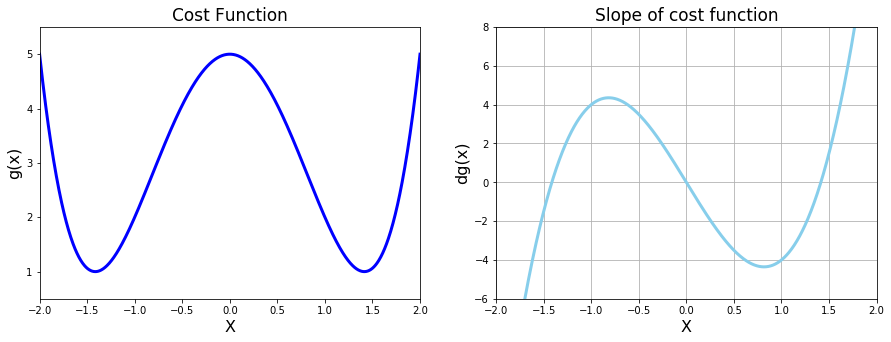

In [5]:
# Plot function and derivative side by side

plt.figure(figsize=[15,5])
# Chart 1: Cost function
# subplot(row, cloumn, index postion)
plt.subplot(1, 2, 1)

plt.title('Cost Function', fontsize=17)
plt.xlim([-2, 2])
plt.ylim([0.5, 5.5])
plt.xlabel('X', fontsize=16)
plt.ylabel('g(x)', fontsize=16)
plt.plot(x_2, g(x_2), color='blue', linewidth=3)

# Chart 2: Derivative
# subplot(row, cloumn, index postion) 
plt.subplot(1, 2, 2)

plt.title('Slope of cost function', fontsize=17)
plt.xlim([-2, 2])
plt.ylim([-6, 8])
plt.xlabel('X', fontsize=16)
plt.ylabel('dg(x)', fontsize=16)
plt.grid()
plt.plot(x_2, dg(x_2), color='skyblue', linewidth=3)

plt.show()

In [21]:
# Gradient Descent
def gradient_descent(derivative_func, initial_guess, multiplier=0.02, precision=0.001):
    
    new_x = initial_guess

    x_list = [new_x]
    slope_list = [derivative_func(new_x)]

    for i in range(100):
        previous_x = new_x
        gradient = derivative_func(new_x)
        new_x = previous_x - multiplier * gradient

        step_size = abs(new_x - previous_x)

        x_list.append(new_x)
        slope_list.append(derivative_func(new_x))

        if step_size < precision:
            # print('Loop ran this many times', i)
            break
    return new_x, x_list, slope_list
    
local_min, list_x, deriv_list = gradient_descent(derivative_func=dg, initial_guess=0.5, multiplier=0.02, precision=0.001)
print('Local minimum occurs at:', local_min)
print('No: of steps to reach local min:', len(list_x))
print('Slope or dg(x) at this point is:', dg(local_min))
print('Cost or g(x) at this pointis:', g(local_min))

Local minimum occurs at: 1.4122375085019094
No: of steps to reach local min: 23
Slope or dg(x) at this point is: -0.03155062633818417
Cost or g(x) at this pointis: 1.00003119467776


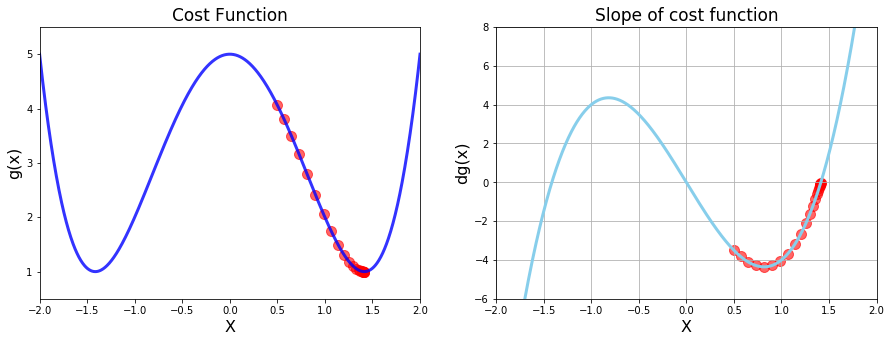

In [22]:
# Gradient Descent plot

plt.figure(figsize=[15,5])
# Chart 1: Cost function
# subplot(row, cloumn, index postion)
plt.subplot(1, 2, 1)

plt.title('Cost Function', fontsize=17)
plt.xlim([-2, 2])
plt.ylim([0.5, 5.5])
plt.xlabel('X', fontsize=16)
plt.ylabel('g(x)', fontsize=16)
plt.plot(x_2, g(x_2), color='blue', linewidth=3, alpha=0.8)

values = np.array(list_x)
plt.scatter(values, g(values), color='red', s=100, alpha=0.6)

# Chart 2: Derivative
# subplot(row, cloumn, index postion) 
plt.subplot(1, 2, 2)

plt.title('Slope of cost function', fontsize=17)
plt.xlim([-2, 2])
plt.ylim([-6, 8])
plt.xlabel('X', fontsize=16)
plt.ylabel('dg(x)', fontsize=16)
plt.grid()
plt.plot(x_2, dg(x_2), color='skyblue', linewidth=3)

plt.scatter(list_x, deriv_list, color='red', s=100, alpha=0.6)

plt.show()